# PyRAMSES startup system

Please check https://pyramses.sps-lab.org/ for the documentation.

In [1]:
import pyramses
import os

Prepare the case study (check https://pyramses.sps-lab.org/interface/case.html):

In [2]:
case = pyramses.cfg()
case.addOut('output.trace') # save the simulation output
case.addData('dyn_B.dat') # Dynamic data
case.addData('volt_rat_B.dat') # power-flow data
case.addData('settings1.dat') # solver settings
case.addInit('init.trace') # save initialization procedure
case.addDst('nothing.dst') # description of disturbance
case.addCont('cont.trace') # save continuous trace
case.addDisc('disc.trace') # save discrete trace
case.addObs('obs.dat')
case.addTrj('output.trj')

Clear all the previous simulation files:

In [3]:
for item in os.listdir('.'):
    if item.endswith(('.trace', '.trj')):
        os.remove(os.path.join('.', item))

Start the simulator (check https://pyramses.sps-lab.org/interface/simul.html):

In [4]:
ram = pyramses.sim()
try:
    ram.execSim(case,0.0)
except:
    print(ram.getLastErr()) 

Trip the generator 'g2' at t=10.00 seconds:

In [5]:
ram.addDisturb(10.00, 'BREAKER SYNC_MACH g7 0')

0

Simulate until t=150.0 s (check https://pyramses.sps-lab.org/interface/simul.html):

In [6]:
try:
    ram.contSim(150.0) 
    ram.endSim()
except:
    print(ram.getLastErr())   

Uncomment to see the log file:

In [7]:
#print(open(case.getOut()).read())

Get the results and plot the voltage evolution (check https://pyramses.sps-lab.org/interface/extractor.html):

In [8]:
ext = pyramses.extractor(case.getTrj())

Plot the frequency deviation:

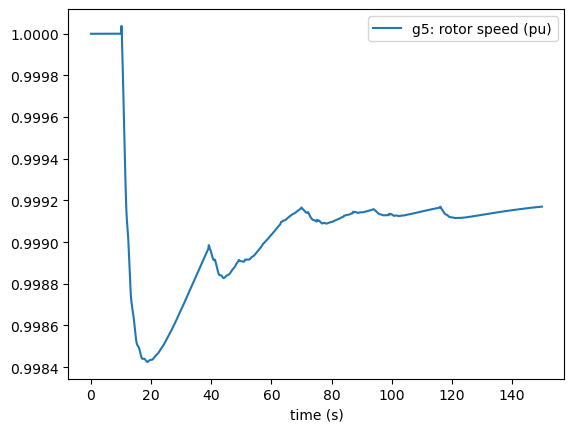

In [9]:
ext.getSync('g5').S.plot()

Plot the valve output of the governor of 'g5':

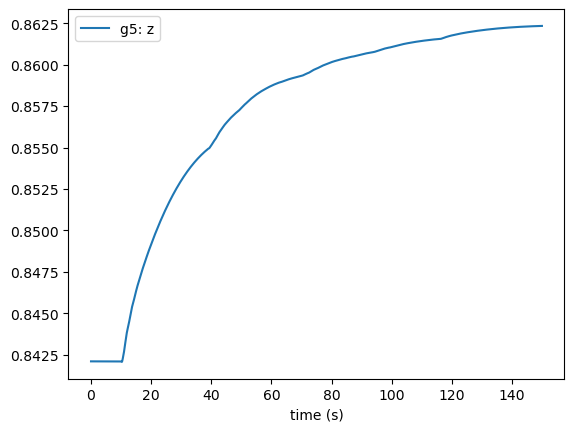

In [10]:
ext.getTor('g5').z.plot()

Plot the mechanical power output of generator 'g5' in per unit (0-1):

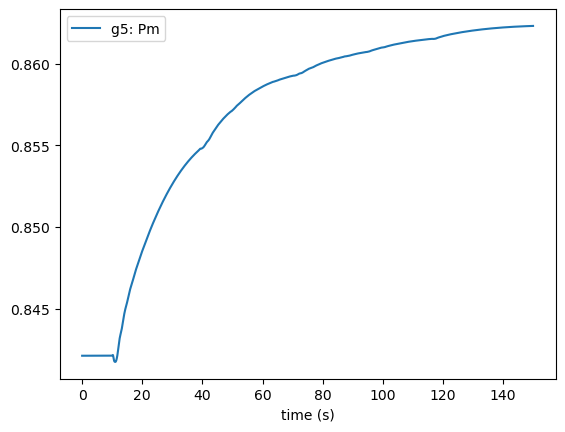

In [11]:
ext.getTor('g5').Pm.plot()

Plot the electrical active power output of 'g5':

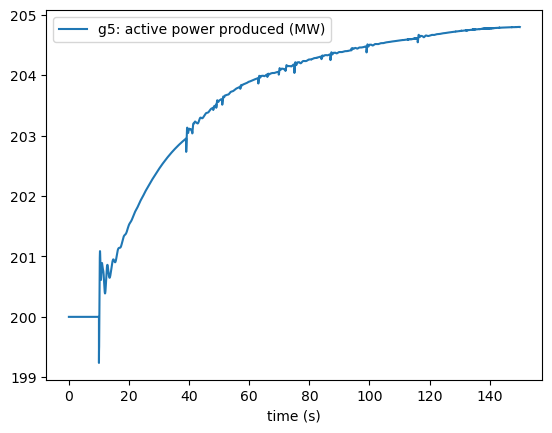

In [12]:
ext.getSync('g5').P.plot()

Plot the voltage at the terminal of generator 'g5':

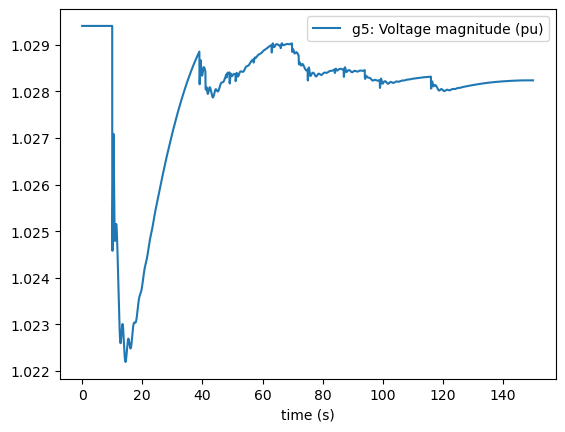

In [13]:
ext.getBus('g5').mag.plot()

Plot the electrical reactive power output of 'g5':

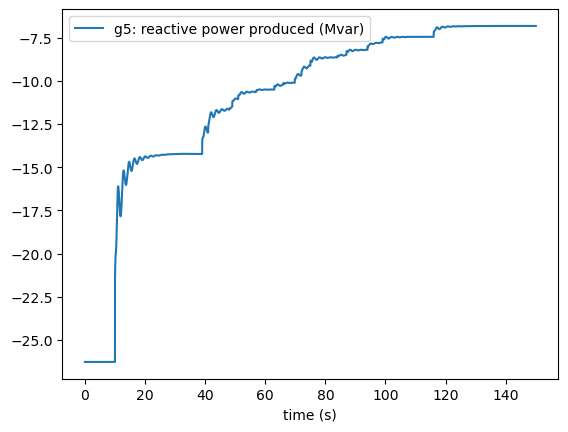

In [14]:
ext.getSync('g5').Q.plot()